# Start

In [1]:
import numpy as np

def sigmoid(x):
    result = 1/(1+np.exp(-x))
    return result

def sigmoid_derivative(x):
    result = x * (1 - x)
    return result

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


In [2]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([[0], [1], [1], [0]])  # Target output


In [3]:
np.random.seed(42)

# Layer 1
input_n = 2
hidden_n = 2
output_n = 1

W1 = np.random.uniform(-1, 1, (input_n, hidden_n))  # Weights for input to hidden
b1 = np.zeros((1, hidden_n))  # Bias for hidden layer

# Layer 2 (hidden to output)
W2 = np.random.uniform(-1, 1, (hidden_n, output_n))  # Weights for hidden to output
b2 = np.zeros((1, output_n))  # Bias for output layer

In [7]:
epochs = 10000
learning_rate = 0.1
loss_history = []

for epoch in range(epochs):
    # Forward Pass
    # Input to hidden
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    # Hidden to output
    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # Loss calculation
    loss = mse_loss(y, final_output)
    loss_history.append(loss)  # Save the loss for this epoch

    # Backward Pass
    # Output layer error and gradient
    output_error = y - final_output
    output_gradient = output_error * sigmoid_derivative(final_output)

    # Hidden layer error and gradient
    hidden_error = np.dot(output_gradient, W2.T)
    hidden_gradient = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2 += np.dot(hidden_output.T, output_gradient) * learning_rate
    b2 += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate

    W1 += np.dot(X.T, hidden_gradient) * learning_rate
    b1 += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.0021
Epoch 1000, Loss: 0.0019
Epoch 2000, Loss: 0.0018
Epoch 3000, Loss: 0.0017
Epoch 4000, Loss: 0.0016
Epoch 5000, Loss: 0.0015
Epoch 6000, Loss: 0.0014
Epoch 7000, Loss: 0.0013
Epoch 8000, Loss: 0.0012
Epoch 9000, Loss: 0.0012


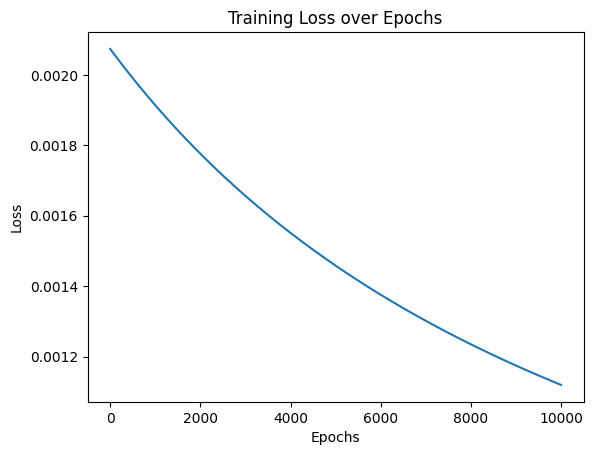

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training Loss over Epochs')
plt.show()
